## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

## 1. Is the data normal?

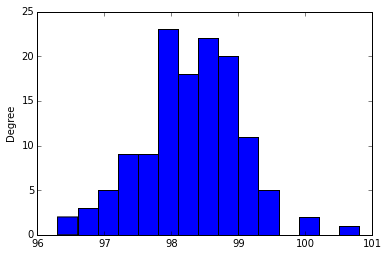

In [3]:
df['temperature'].plot(kind='hist', bins=15)

In [4]:
len(df)

130

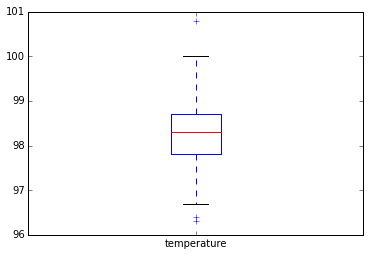

In [5]:
df['temperature'].plot(kind='box')

The data appears to be approximately normal, but slightly right-skewed. The boxplot of the data shows the temperature data is fairly symmetric. To confirm that the data is indeed normal, construct a normal probability plot.

/Users/jag/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


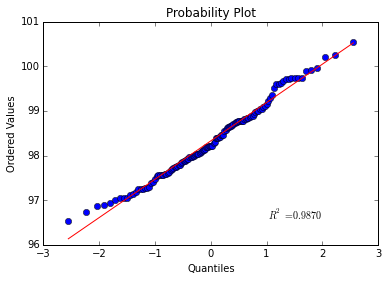

In [6]:
from scipy import stats
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
x = stats.norm.rvs(loc=df['temperature'].mean(), scale=df['temperature'].std(), size=len(df))
res = stats.probplot(x, plot=plt)
fig.show()

The temperature appears normal, so the normality condition to use the CLT is met for this dataset.  

## 2. Is true population mean really 98.6 deg. F?

In [7]:
df['temperature'].describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [8]:
mean = df['temperature'].mean()
s = df['temperature'].std()
n = len(df['temperature'])
SE = s / n ** 0.5
print 'Std Error:', SE

Std Error: 0.0643044168381


Construct a hypothesis test, using z-test since we have > 100 samples and a normally-distributed sample. A t-test could be used, but since there are 130 samples, the 129 degrees of freedom would make the t-distribution very similar to the normal distribution. 

H0 (Null Hypothesis) = Mean Temperature = 98.6

HA (Alternative Hypothesis) = Mean Temperature != 98.6


In [9]:
z = (mean - 98.6) / SE
z

-5.4548232923463891

Since we aren't interested in the direction of the change, use a 2-sided hypothesis test.

In [10]:
p = stats.norm.sf(abs(z))*2
p

4.9021570146013884e-08

Since the p-value is much smaller than the significance level (0.05), there is convincing evidence to **reject** the null hypothesis that the mean temperature is 98.6 deg. F.

## 3.  At what temperature should we consider someone's temperature to be "abnormal"?

For this analysis, compute the margin of error and 95% confidence interval for the sample distribution. 

In [11]:
ME = 1.96 * SE
CI = (mean - ME, mean + ME)
CI

(98.123194112228063, 98.375267426233435)

We can be 95% certain that the mean body temperature should be between 98.1 and 98.4 degrees F. Mean temperatures outside this range would be considered abnormal.   

## 4. Is there a significant difference between males and females in normal temperature?

Use a two-sample hypothesis test to determine if a statistically-significant different in normal temperatures occurs between males and females:

H0 (null) = mean_males - mean_females == 0

HA (alternative) = mean_males - mean_females != 0

Since the direction of the difference is unimportant, use a two-sided hypothesis test.

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.1+ KB


In [13]:
males = df[df.gender == 'M']['temperature']
females = df[df.gender == 'F']['temperature']

In [14]:
males.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [15]:
females.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

The sample difference of two means can be modeled using the t-distribution. So next, calculate the T-statistic and p-value.

In [17]:
t, p = stats.ttest_ind(males, females, equal_var=False)
print 't:', t
print 'p:', p


t: -2.28543453817
p: 0.0239382641829


Since the p-value (0.02) is smaller than the significance level (0.05), there is convincing evidence to **reject** the null hypothesis that there is no difference in the mean temperature between males and females. Therefore, there is a statistically-significant difference between the mean body temperatures of males and females.